In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
result = []
while len(result) != 20:
    r = np.random.randint(1, 21)
    if r not in result:
        result.append(r)
print(result)

[14, 13, 8, 5, 16, 17, 7, 1, 19, 18, 12, 3, 15, 4, 10, 6, 9, 11, 20, 2]


<IPython.core.display.Javascript object>


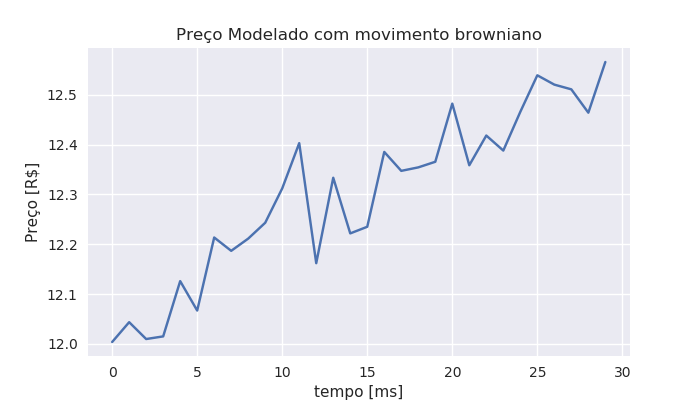

Text(0.5,1,'Preço Modelado com movimento browniano')

In [4]:
po=12

mu=.02
sigma=.055
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(7, 4))
plt.plot(p1)
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preço Modelado com movimento browniano')


<IPython.core.display.Javascript object>


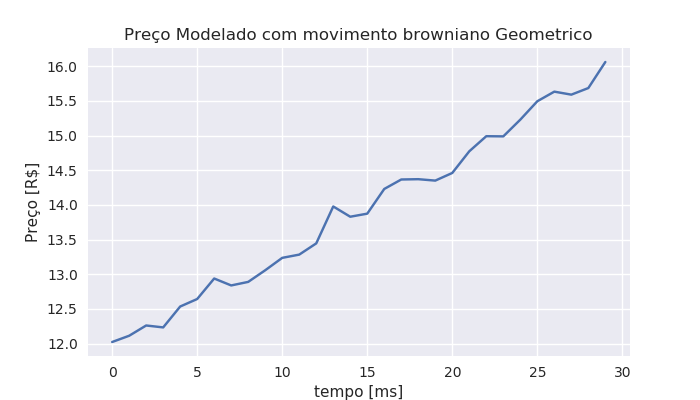

Text(0.5,1,'Preço Modelado com movimento browniano Geometrico')

In [5]:
po=12
mu=.01
sigma=.009
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(7, 4))
plt.plot(p2)
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [ms]')
plt.title('Preço Modelado com movimento browniano Geometrico')


<IPython.core.display.Javascript object>


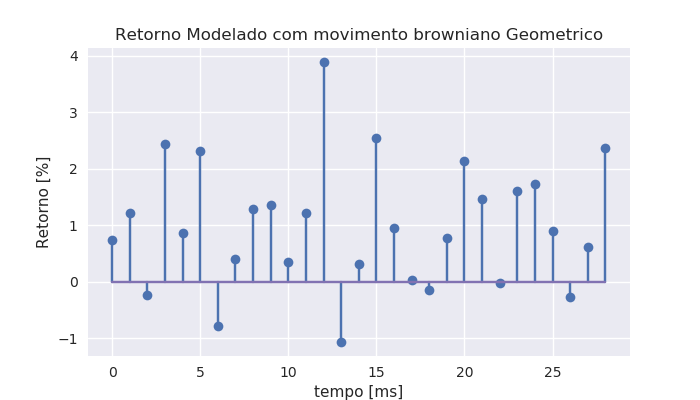

Text(0.5,1,'Retorno Modelado com movimento browniano Geometrico')

In [6]:
s2=100*(np.log(p2[1:])-np.log(p2[0:-1]))

fig = plt.subplots(figsize=(7, 4))
plt.stem(s2)
plt.ylabel('Retorno [%]')
plt.xlabel('tempo [ms]')
plt.title('Retorno Modelado com movimento browniano Geometrico')


<IPython.core.display.Javascript object>


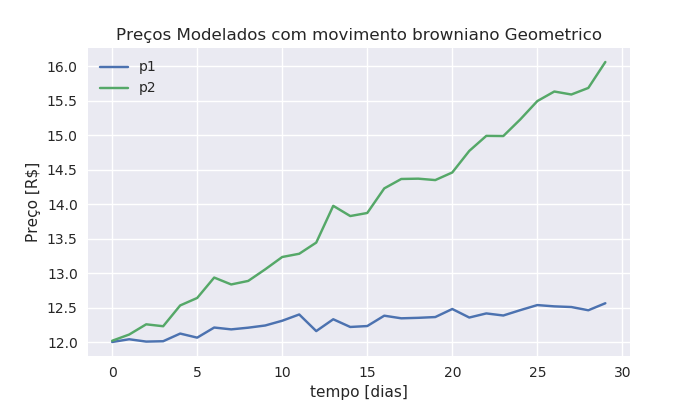

Text(0.5,1,'Preços Modelados com movimento browniano Geometrico')

In [7]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

fig = plt.subplots(figsize=(7, 4))
plt.plot(df['p1'],label='p1')
plt.plot(df['p2'],label='p2')

plt.legend(loc='upper left')
plt.ylabel('Preço [R$]')
plt.xlabel('tempo [dias]')
plt.title('Preços Modelados com movimento browniano Geometrico')


<IPython.core.display.Javascript object>


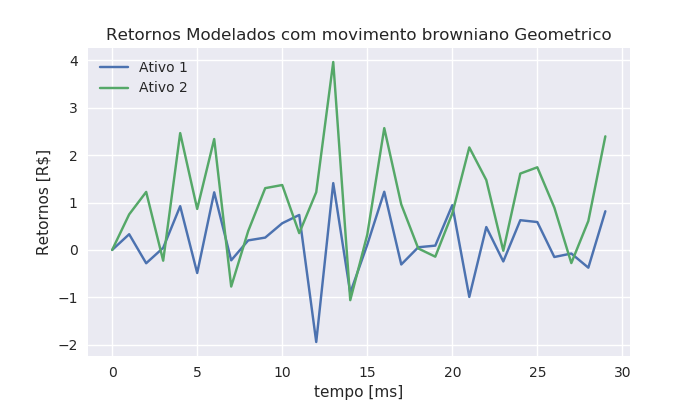

Text(0.5,1,'Retornos Modelados com movimento browniano Geometrico')

In [8]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(7, 4))
plt.plot(100*df['r1'],label='Ativo 1')  
plt.plot(100*df['r2'],label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Retornos [R$]')
plt.xlabel('tempo [ms]')
plt.title('Retornos Modelados com movimento browniano Geometrico')


<IPython.core.display.Javascript object>


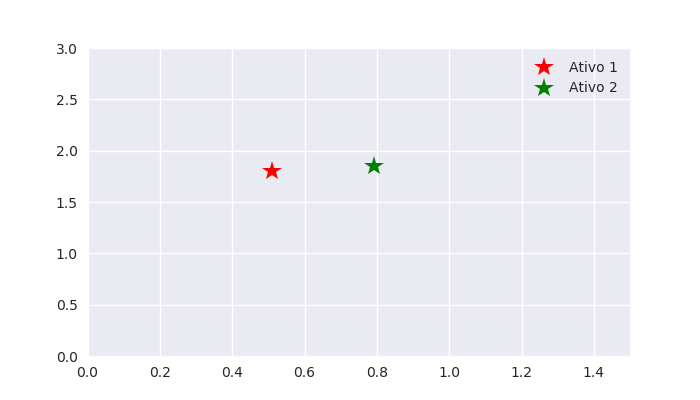

/home/mrclnndrd/anaconda3/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "center top". Falling back on "best"; valid locations are
	center
	upper left
	right
	upper right
	best
	lower left
	lower right
	lower center
	center left
	upper center
	center right

  % (loc, '\n\t'.join(self.codes)))


[0, 1.5, 0, 3]

In [9]:
po=12

mu=.0045
sigma=.055
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p1=po+mu*t+sigma*w



po=12
mu=.00058
sigma=.0045
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)

risk1=df['r1'].std()
return1=df['r1'].sum()
risk2=df['r2'].std()
return2=df['r2'].sum()

fig = plt.subplots(figsize=(7, 4))
plt.plot(100*risk1, 100*return1, 'r*', markersize=15.0,label='Ativo 1')  
plt.plot(100*risk2, 100*return2, 'g*', markersize=15.0,label='Ativo 2') 
plt.legend(loc='center top')
plt.axis([0,1.5,0,3])


In [47]:
df.head(10)


,p1,p2,r1,r2
0,11.982085,12.036933,0.000000,0.000000
1,12.095173,12.018562,0.009438,-0.001526
2,12.022776,11.945003,-0.005986,-0.006120
3,12.094797,11.950379,0.005990,0.000450
4,12.031067,12.125845,-0.005269,0.014683
5,12.011185,12.012117,-0.001653,-0.009379
6,11.943369,11.961183,-0.005646,-0.004240
7,12.107025,12.174861,0.013703,0.017864
8,12.062896,11.977153,-0.003645,-0.016239
9,12.043549,11.993933,-0.001604,0.001401


In [ ]:
df.std()

In [10]:
sharpe1=(df['r1'].sum()-5/(12*30))/df['r1'].std()
sharpe2=(df['r2'].sum()-5/(12*30))/df['r2'].std()
[sharpe1,sharpe2]

[0.8130491327620888, 0.5879514439967041]

In [19]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()
[cor1 ,cor2['r1'][1]]

df[['r1','r2']].corr()


,r1,r2
r1,1.00000,0.07051
r2,0.07051,1.00000


In [57]:
DF=pd.DataFrame([12.4, 12.8, 12.3, 12.1, 12.5])
DF.columns=['p1']
DF['p2']=[45.3, 45.9, 45.1, 44.7, 45.2]
r1=DF['p1'][1:].values/DF['p1'][0:-1].values-1
DF['r1']=np.concatenate(([0], r1), axis=0)
r2=DF['p2'][1:].values/DF['p2'][0:-1].values-1
DF['r2']=np.concatenate(([0], r2), axis=0)

In [55]:
mu=DF[['r1','r2']][1:].mean().values
sigma=DF[['r1','r2']][1:].std().values
I = np.identity(2)
ss=sigma*I
np.corrcoef(DF['r1'].values,DF['r2'].values)


array([[ 1.        ,  0.99619867],
       [ 0.99619867,  1.        ]])

<IPython.core.display.Javascript object>


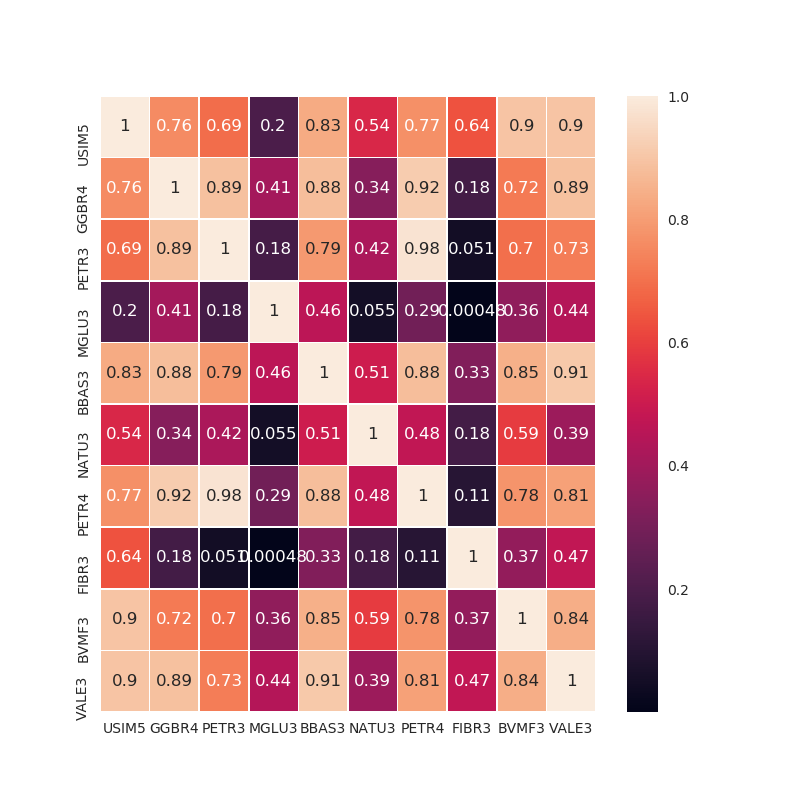

In [61]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

STOCKS=['USIM5_H1_201601041000_201801291700.csv','GGBR4_H1_201601041000_201801291700.csv',
        'PETR3_H1_201601041000_201801291700.csv','MGLU3_H1_201601041000_201801291700.csv',
        'BBAS3_H1_201601041000_201801291700.csv','NATU3_H1_201601041000_201801291700.csv',
        'PETR4_H1_201601041000_201801291700.csv','FIBR3_H1_201601041000_201801291700.csv',
        'BVMF3_H1_201601041000_201801291700.csv','VALE3_H1_201601041000_201801291700.csv']
Name=[]
for p in range(0,  len(STOCKS)):
    df = read_csv(STOCKS[p], header=None)
    DATE=[]
    TIME=[]
    OPEN=[]
    HIGH=[]
    LOW=[]
    CLOSE=[]
    TVOL=[]
    RVOL=[]
    S=[]
    for k in range(1,  len(df)):
        Date,Time,Open,High,Low,Close,TVol,RVol,s =df.iloc[k][0].split("\t")
        DATE.append(datetime.strptime(Date+" "+Time,"%Y.%m.%d %H:%M:%S"))
        OPEN.append(float(Open))
        HIGH.append(float(High))    
        LOW.append(float(Low))
        CLOSE.append(float(Close))  
        TVOL.append(int(TVol))
        RVOL.append(int(RVol))
        S.append(s)
    stock=pd.DataFrame([DATE,OPEN,HIGH,LOW,CLOSE,TVOL,RVOL]).transpose()    
    stock.columns = ['DATE','OPEN','HIGH','LOW','CLOSE','TVOL','RVOL']
    stock.set_index('DATE', inplace=True)
    if p==0:
        result = stock['CLOSE'].astype(float) #pd.concat([stock['CLOSE'], stock['CLOSE']], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][0:5])  
    if p==1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])            
        Name.append(STOCKS[p][0:5])       
    if p>1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][0:5]) 
result.columns=Name
corre=result.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

In [ ]:
stock.head()

<IPython.core.display.Javascript object>


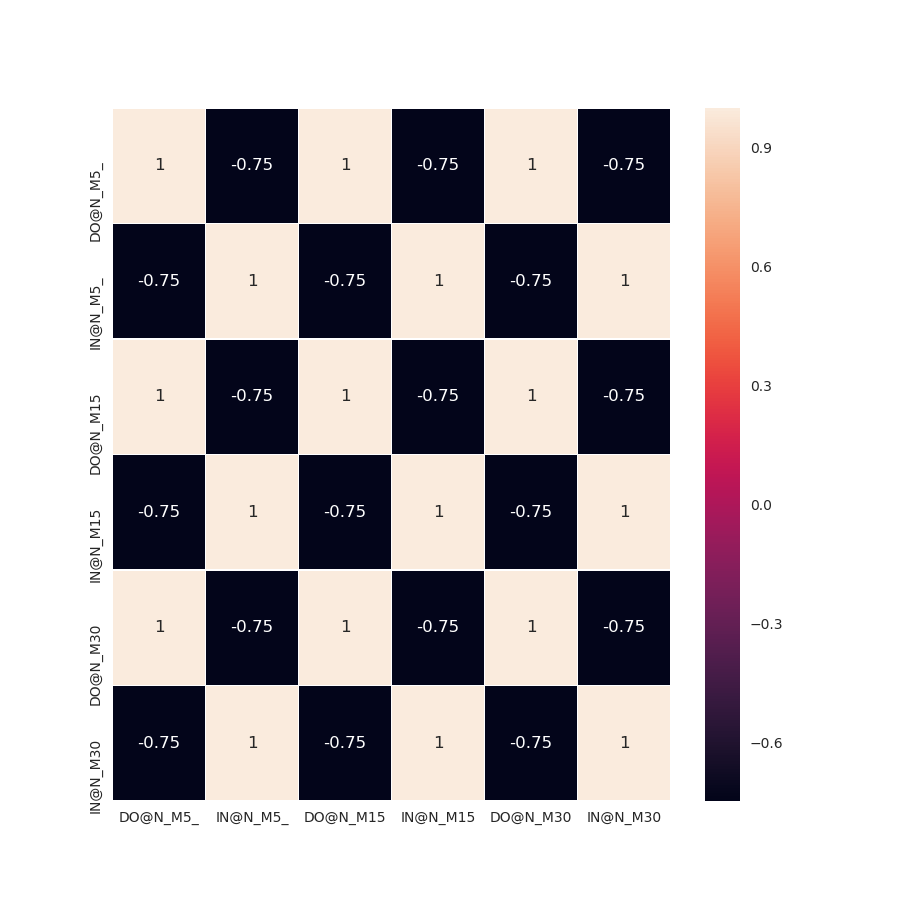

In [62]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

STOCKS=['WDO@N_M5_201601040900_201803221755.csv','WIN@N_M5_201601040900_201803231800.csv',
        'WDO@N_M15_201601040900_201803211745.csv','WIN@N_M15_201601040900_201803221630.csv',        
        'WDO@N_M30_201601040900_201803221730.csv','WIN@N_M30_201601040900_201803231800.csv']

Name=[]
for p in range(0,  len(STOCKS)):
    df = read_csv(STOCKS[p], header=None)
    DATE=[]
    TIME=[]
    OPEN=[]
    HIGH=[]
    LOW=[]
    CLOSE=[]
    TVOL=[]
    RVOL=[]
    S=[]
    for k in range(1,  len(df)):
        Date,Time,Open,High,Low,Close,TVol,RVol,s =df.iloc[k][0].split("\t")
        DATE.append(datetime.strptime(Date+" "+Time,"%Y.%m.%d %H:%M:%S"))
        OPEN.append(float(Open))
        HIGH.append(float(High))    
        LOW.append(float(Low))
        CLOSE.append(float(Close))  
        TVOL.append(int(TVol))
        RVOL.append(int(RVol))
        S.append(s)
    stock=pd.DataFrame([DATE,OPEN,HIGH,LOW,CLOSE,TVOL,RVOL]).transpose()    
    stock.columns = ['DATE','OPEN','HIGH','LOW','CLOSE','TVOL','RVOL']
    stock.set_index('DATE', inplace=True)
    if p==0:
        result = stock['CLOSE'].astype(float) #pd.concat([stock['CLOSE'], stock['CLOSE']], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][1:9])  
    if p==1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])            
        Name.append(STOCKS[p][1:9])       
    if p>1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][1:9]) 
result.columns=Name
corre=result.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

In [63]:
corre


,DO@N_M5_,IN@N_M5_,DO@N_M15,IN@N_M15,DO@N_M30,IN@N_M30
DO@N_M5_,1.000000,-0.747965,0.999859,-0.747945,0.999678,-0.747971
IN@N_M5_,-0.747965,1.000000,-0.747787,0.999960,-0.747737,0.999910
DO@N_M15,0.999859,-0.747787,1.000000,-0.747777,0.999807,-0.747809
IN@N_M15,-0.747945,0.999960,-0.747777,1.000000,-0.745885,0.999950
DO@N_M30,0.999678,-0.747737,0.999807,-0.745885,1.000000,-0.745485
IN@N_M30,-0.747971,0.999910,-0.747809,0.999950,-0.745485,1.000000
